In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math  
import sklearn.metrics  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [10]:
data = pd.read_csv('dataset/bike_sharing_dataset/hour.csv')
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [11]:
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [13]:
data.rename(columns={
    'instant': 'index',
    'dteday': 'datetime',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit':'weather_conditions',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

print(data.head())

   index    datetime  season  year  month  hour  holiday  weekday  workingday  \
0      1  2011-01-01       1     0      1     0        0        6           0   
1      2  2011-01-01       1     0      1     1        0        6           0   
2      3  2011-01-01       1     0      1     2        0        6           0   
3      4  2011-01-01       1     0      1     3        0        6           0   
4      5  2011-01-01       1     0      1     4        0        6           0   

   weather_conditions  temp   atemp  humidity  windspeed  casual  registered  \
0                   1  0.24  0.2879      0.81        0.0       3          13   
1                   1  0.22  0.2727      0.80        0.0       8          32   
2                   1  0.22  0.2727      0.80        0.0       5          27   
3                   1  0.24  0.2879      0.75        0.0       3          10   
4                   1  0.24  0.2879      0.75        0.0       0           1   

   count  
0     16  
1     40  

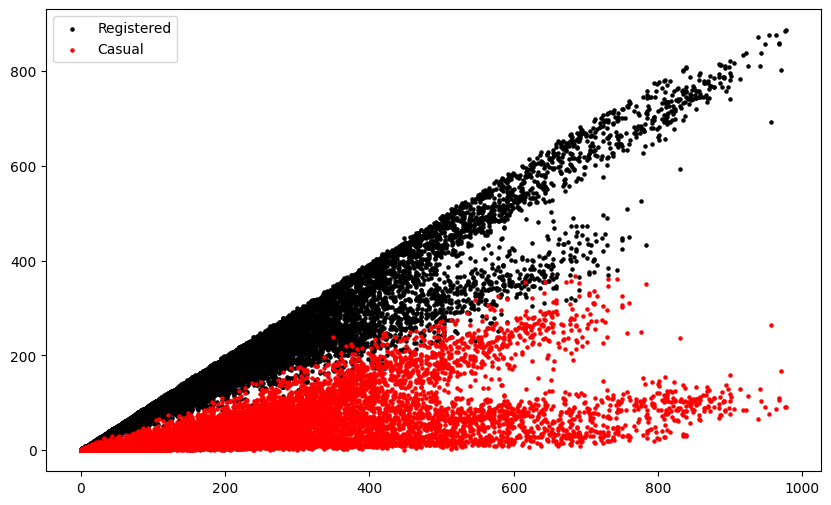

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(data['count'], data['registered'], c='black', s= 5, label = 'Registered')
plt.scatter(data['count'], data['casual'], c='red', s=5, label = 'Casual')
plt.legend()
plt.show()

In [15]:
data.drop(['index', 'registered', 'casual'], axis=1, inplace=True)
print(data.head())

     datetime  season  year  month  hour  holiday  weekday  workingday  \
0  2011-01-01       1     0      1     0        0        6           0   
1  2011-01-01       1     0      1     1        0        6           0   
2  2011-01-01       1     0      1     2        0        6           0   
3  2011-01-01       1     0      1     3        0        6           0   
4  2011-01-01       1     0      1     4        0        6           0   

   weather_conditions  temp   atemp  humidity  windspeed  count  
0                   1  0.24  0.2879      0.81        0.0     16  
1                   1  0.22  0.2727      0.80        0.0     40  
2                   1  0.22  0.2727      0.80        0.0     32  
3                   1  0.24  0.2879      0.75        0.0     13  
4                   1  0.24  0.2879      0.75        0.0      1  


<Axes: >

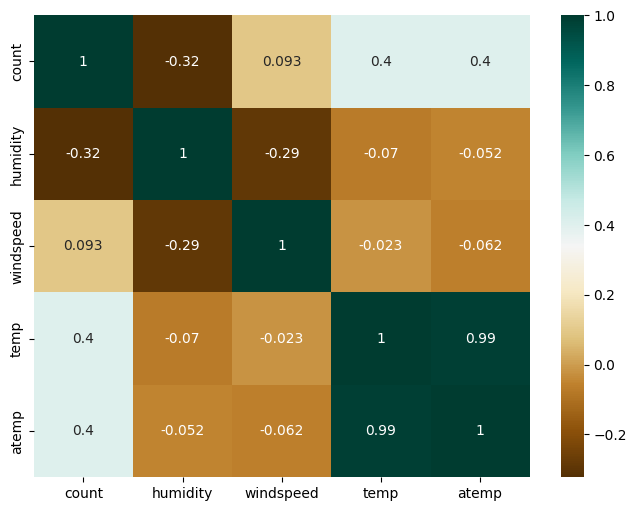

In [16]:
data['datetime'] = pd.to_datetime(data.datetime)
# categorical variables
data['season'] = data.season.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['weather_conditions'] = data.weather_conditions.astype('category')
data['workingday'] = data.workingday.astype('category')
data['month'] = data.month.astype('category')
data['year'] = data.year.astype('category')
data['hour'] = data.hour.astype('category')
plt.figure(figsize = (8,6))
sns.heatmap(data[['count', 'humidity', 'windspeed', 'temp', 'atemp']].corr(),annot = True, cmap = 'BrBG')

In [17]:
data.drop(['atemp'], inplace = True, axis = 1)
data.head()

,datetime,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,humidity,windspeed,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [18]:
data.drop(['datetime'], axis=1,inplace=True)
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [20]:
y = data['count']
X = data.drop('count', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

139.4366554624435


In [22]:
model_2 = RandomForestRegressor(n_estimators = 200, max_depth = 15)
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

42.617160614127606


In [23]:
pipeline = Pipeline(steps= [
    ('model', model_2)
])

In [24]:
model = pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(math.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))

42.43686306963648


In [25]:
import joblib
joblib.dump(model_2, 'model.pkl')

['model.pkl']

In [28]:
import requests
url = 'http://127.0.0.1:5000/predict'
data = {'features':[1.0, 0.0, 1.0, 0.0, 0.0, 6.0, 0.0, 1.0, 0.24, 0.81, 0.0]}
response = requests.post(url=url, json=data)

print(response.json())


{'predictions': [22.384255952380954]}
